Nama : Nadia Ramadhani, Faiqotul Mahmudah

In [1]:
#Import Library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices
import sklearn
import sklearn.metrics
from sklearn import ensemble
from sklearn import linear_model

ModuleNotFoundError: No module named 'statsmodels'

In [ ]:
data = pd.read_csv("A2022_dataset_buat bedah data.csv", chunksize = 1000,  on_bad_lines = 'skip', delimiter = ';')
chunk_number = 1
chunks = []

for i, chunk in enumerate(data):
    data = pd.DataFrame(chunk)
    chunks.append(data)
    if i == chunk_number:
        break

In [ ]:
data = pd.concat(chunks)
data.head()

,kodepemda,namapemda,sumber,tahun,bulan,kodedata,jeniscoa,nomorperda,tanggalperda,namaaplikasi,...,namaakunsubsubrinci,kodeakunsubsubsubrinci,namaakunsubsubsubrinci,volume,satuan,hargasatuan,kodesumberdana,namasumberdana,nilaianggaran,catatan
0,1.0,Provinsi Aceh,Sinergi5,2022,0,1,3,-,1900-01-01,NaN,...,NaN,NaN,NaN,0,NaN,0,NaN,NaN,31600000,NaN
1,1.0,Provinsi Aceh,Sinergi5,2022,0,1,3,-,1900-01-01,NaN,...,NaN,NaN,NaN,0,NaN,0,NaN,NaN,50000000,NaN
2,1.0,Provinsi Aceh,Sinergi5,2022,0,1,3,-,1900-01-01,NaN,...,NaN,NaN,NaN,0,NaN,0,NaN,NaN,57250000,NaN
3,1.0,Provinsi Aceh,Sinergi5,2022,0,1,3,-,1900-01-01,NaN,...,NaN,NaN,NaN,0,NaN,0,NaN,NaN,50000000,NaN
4,1.0,Provinsi Aceh,Sinergi5,2022,0,1,3,-,1900-01-01,NaN,...,NaN,NaN,NaN,0,NaN,0,NaN,NaN,600669000,NaN


In [ ]:
data.tail()

,kodepemda,namapemda,sumber,tahun,bulan,kodedata,jeniscoa,nomorperda,tanggalperda,namaaplikasi,...,namaakunsubsubrinci,kodeakunsubsubsubrinci,namaakunsubsubsubrinci,volume,satuan,hargasatuan,kodesumberdana,namasumberdana,nilaianggaran,catatan
1995,1.0,Provinsi Aceh,Sinergi5,2022,0,1,3,-,1900-01-01,NaN,...,NaN,NaN,NaN,0,NaN,0,NaN,NaN,1087300000,NaN
1996,1.0,Provinsi Aceh,Sinergi5,2022,0,1,3,-,1900-01-01,NaN,...,NaN,NaN,NaN,0,NaN,0,NaN,NaN,53160000,NaN
1997,1.0,Provinsi Aceh,Sinergi5,2022,0,1,3,-,1900-01-01,NaN,...,NaN,NaN,NaN,0,NaN,0,NaN,NaN,642125000,NaN
1998,1.0,Provinsi Aceh,Sinergi5,2022,0,1,3,-,1900-01-01,NaN,...,NaN,NaN,NaN,0,NaN,0,NaN,NaN,18891200,NaN
1999,1.0,Provinsi Aceh,Sinergi5,2022,0,1,3,-,1900-01-01,NaN,...,NaN,NaN,NaN,0,NaN,0,NaN,NaN,2694027217,NaN


In [ ]:
#Menampilkan nama-nama kolom.

print("Shape : {s}".format(s = data.shape))
print("Column headers/names: {s}".format(s = list(data)))

Shape : (2000, 60)
Column headers/names: ['kodepemda', 'namapemda', 'sumber', 'tahun', 'bulan', 'kodedata', 'jeniscoa', 'nomorperda', 'tanggalperda', 'namaaplikasi', 'pengembangaplikasi', 'kodefungsi', 'namafungsi', 'kodesubfungsi', 'namasubfungsi', 'kodeurusanprogram', 'namaurusanprogram', 'kodeurusanpelaksana', 'namaurusanpelaksana', 'kodeskpd', 'namaskpd', 'kodeunitskpd', 'namaunitskpd', 'kodeprogram', 'namaprogram', 'namaoutcome', 'targetoutcome', 'satuanoutcome', 'kodekegiatan', 'namakegiatan', 'kodesubkegiatan', 'namasubkegiatan', 'namaoutput', 'targetoutput', 'satuanoutput', 'kodelokasi', 'namalokasi', 'kodeakunutama', 'namaakunutama', 'kodeakunkelompok', 'namaakunkelompok', 'kodeakunjenis', 'namaakunjenis', 'kodeakunobjek', 'namaakunobjek', 'kodeakunrinci', 'namaakunrinci', 'kodeakunsubrinci', 'namaakunsubrinci', 'kodeakunsubsubrinci', 'namaakunsubsubrinci', 'kodeakunsubsubsubrinci', 'namaakunsubsubsubrinci', 'volume', 'satuan', 'hargasatuan', 'kodesumberdana', 'namasumberdana'

Data Pre-Processing

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 60 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   kodepemda               2000 non-null   float64
 1   namapemda               2000 non-null   object 
 2   sumber                  2000 non-null   object 
 3   tahun                   2000 non-null   int64  
 4   bulan                   2000 non-null   int64  
 5   kodedata                2000 non-null   int64  
 6   jeniscoa                2000 non-null   int64  
 7   nomorperda              2000 non-null   object 
 8   tanggalperda            2000 non-null   object 
 9   namaaplikasi            0 non-null      float64
 10  pengembangaplikasi      0 non-null      float64
 11  kodefungsi              2000 non-null   int64  
 12  namafungsi              2000 non-null   object 
 13  kodesubfungsi           2000 non-null   int64  
 14  namasubfungsi           0 non-null      

In [ ]:
data.describe()

,kodepemda,tahun,bulan,kodedata,jeniscoa,namaaplikasi,pengembangaplikasi,kodefungsi,kodesubfungsi,namasubfungsi,...,namaakunsubsubrinci,kodeakunsubsubsubrinci,namaakunsubsubsubrinci,volume,satuan,hargasatuan,kodesumberdana,namasumberdana,nilaianggaran,catatan
count,2000.0,2000.0,2000.0,2000.0,2000.0,0.0,0.0,2000.000000,2000.0,0.0,...,0.0,0.0,0.0,2000.0,0.0,2000.0,0.0,0.0,2.000000e+03,0.0
mean,1.0,2022.0,0.0,1.0,3.0,NaN,NaN,8.775500,0.0,NaN,...,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,3.251770e+09,NaN
std,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.960873,0.0,NaN,...,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,2.406511e+10,NaN
min,1.0,2022.0,0.0,1.0,3.0,NaN,NaN,1.000000,0.0,NaN,...,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,1.347000e+03,NaN
25%,1.0,2022.0,0.0,1.0,3.0,NaN,NaN,7.000000,0.0,NaN,...,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,1.186000e+07,NaN
50%,1.0,2022.0,0.0,1.0,3.0,NaN,NaN,10.000000,0.0,NaN,...,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,4.999436e+07,NaN
75%,1.0,2022.0,0.0,1.0,3.0,NaN,NaN,10.000000,0.0,NaN,...,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,2.826705e+08,NaN
max,1.0,2022.0,0.0,1.0,3.0,NaN,NaN,11.000000,0.0,NaN,...,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,4.763700e+11,NaN


In [ ]:
#Mengecek missing value.

data.isnull().sum()

kodepemda                    0
namapemda                    0
sumber                       0
tahun                        0
bulan                        0
kodedata                     0
jeniscoa                     0
nomorperda                   0
tanggalperda                 0
namaaplikasi              2000
pengembangaplikasi        2000
kodefungsi                   0
namafungsi                   0
kodesubfungsi                0
namasubfungsi             2000
kodeurusanprogram            0
namaurusanprogram            0
kodeurusanpelaksana          0
namaurusanpelaksana          0
kodeskpd                     0
namaskpd                     0
kodeunitskpd                 0
namaunitskpd                 0
kodeprogram                  0
namaprogram                  0
namaoutcome               2000
targetoutcome                0
satuanoutcome             2000
kodekegiatan                 0
namakegiatan                 0
kodesubkegiatan              0
namasubkegiatan              0
namaoutp

In [ ]:
#Drop kolom yang memiliki missing value

data2 = data.drop(['namaaplikasi', 'pengembangaplikasi', 'namasubfungsi',  'namaoutcome', 'satuanoutcome', 'namaoutput', 'satuanoutput', 'kodelokasi', 'namalokasi', 'kodeakunsubsubrinci', 'namaakunsubsubrinci', 'kodeakunsubsubsubrinci', 'namaakunsubsubsubrinci', 'satuan', 'kodesumberdana' , 'namasumberdana', 'catatan'], axis = 1)
data2

,kodepemda,namapemda,sumber,tahun,bulan,kodedata,jeniscoa,nomorperda,tanggalperda,kodefungsi,...,namaakunjenis,kodeakunobjek,namaakunobjek,kodeakunrinci,namaakunrinci,kodeakunsubrinci,namaakunsubrinci,volume,hargasatuan,nilaianggaran
0,1.0,Provinsi Aceh,Sinergi5,2022,0,1,3,-,1900-01-01,10,...,Retribusi Daerah ...,2,Retribusi Jasa Usaha ...,1,Retribusi Pemakaian Kekayaan Daerah ...,5,Retribusi Pemakaian Ruangan ...,0,0,31600000
1,1.0,Provinsi Aceh,Sinergi5,2022,0,1,3,-,1900-01-01,10,...,Retribusi Daerah ...,2,Retribusi Jasa Usaha ...,1,Retribusi Pemakaian Kekayaan Daerah ...,1,Retribusi Penyewaan Tanah dan Bangunan ...,0,0,50000000
2,1.0,Provinsi Aceh,Sinergi5,2022,0,1,3,-,1900-01-01,10,...,Retribusi Daerah ...,2,Retribusi Jasa Usaha ...,6,Retribusi Tempat Penginapan/ Pesanggrahan/Vila...,1,Retribusi Pelayanan Tempat Penginapan/ Pesangg...,0,0,57250000
3,1.0,Provinsi Aceh,Sinergi5,2022,0,1,3,-,1900-01-01,10,...,Lain-lain PAD yang Sah ...,11,Pendapatan Denda atas Keterlambatan Pelaksanaa...,1,Pendapatan Denda atas Keterlambatan Pelaksanaa...,1,Pendapatan Denda atas Keterlambatan Pelaksanaa...,0,0,50000000
4,1.0,Provinsi Aceh,Sinergi5,2022,0,1,3,-,1900-01-01,10,...,Lain-lain PAD yang Sah ...,15,Pendapatan dari Pengembalian ...,1,Pendapatan dari Pengembalian Kelebihan Pembaya...,1,Pendapatan dari Pengembalian Kelebihan Pembaya...,0,0,600669000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1.0,Provinsi Aceh,Sinergi5,2022,0,1,3,-,1900-01-01,7,...,Belanja Modal Peralatan dan Mesin ...,8,Belanja Modal Alat Laboratorium ...,4,Belanja Modal Alat Laboratorium Fisika Nuklir/...,5,Belanja Modal System/Power Supply ...,0,0,1087300000
1996,1.0,Provinsi Aceh,Sinergi5,2022,0,1,3,-,1900-01-01,7,...,Belanja Modal Peralatan dan Mesin ...,8,Belanja Modal Alat Laboratorium ...,5,Belanja Modal Alat Proteksi Radiasi/Proteksi L...,2,Alat Kesehatan Kerja ...,0,0,53160000
1997,1.0,Provinsi Aceh,Sinergi5,2022,0,1,3,-,1900-01-01,7,...,Belanja Modal Peralatan dan Mesin ...,8,Belanja Modal Alat Laboratorium ...,9,Belanja Modal Alat Laboratorium Standarisasi K...,11,Belanja Modal Alat Laboratorium Standarisasi K...,0,0,642125000
1998,1.0,Provinsi Aceh,Sinergi5,2022,0,1,3,-,1900-01-01,7,...,Belanja Modal Peralatan dan Mesin ...,8,Belanja Modal Alat Laboratorium ...,1,Belanja Modal Unit Alat Laboratorium ...,11,Belanja Modal Alat Laboratorium Umum ...,0,0,18891200


In [ ]:
#Mencari data unik

data2['kodefungsi'].unique()

array([10,  7,  6,  3, 11,  4,  5,  8,  1], dtype=int64)

In [ ]:
data2.kodefungsi.value_counts().sort_index()

1       47
3        2
4       40
5        1
6        4
7      582
8        3
10    1320
11       1
Name: kodefungsi, dtype: int64

In [ ]:
#Mengecek kembali.

data2.isnull().sum()

kodepemda              0
namapemda              0
sumber                 0
tahun                  0
bulan                  0
kodedata               0
jeniscoa               0
nomorperda             0
tanggalperda           0
kodefungsi             0
namafungsi             0
kodesubfungsi          0
kodeurusanprogram      0
namaurusanprogram      0
kodeurusanpelaksana    0
namaurusanpelaksana    0
kodeskpd               0
namaskpd               0
kodeunitskpd           0
namaunitskpd           0
kodeprogram            0
namaprogram            0
targetoutcome          0
kodekegiatan           0
namakegiatan           0
kodesubkegiatan        0
namasubkegiatan        0
targetoutput           0
kodeakunutama          0
namaakunutama          0
kodeakunkelompok       0
namaakunkelompok       0
kodeakunjenis          0
namaakunjenis          0
kodeakunobjek          0
namaakunobjek          0
kodeakunrinci          0
namaakunrinci          0
kodeakunsubrinci       0
namaakunsubrinci       0


In [ ]:
data2.head()

,kodepemda,namapemda,sumber,tahun,bulan,kodedata,jeniscoa,nomorperda,tanggalperda,kodefungsi,...,namaakunjenis,kodeakunobjek,namaakunobjek,kodeakunrinci,namaakunrinci,kodeakunsubrinci,namaakunsubrinci,volume,hargasatuan,nilaianggaran
0,1.0,Provinsi Aceh,Sinergi5,2022,0,1,3,-,1900-01-01,10,...,Retribusi Daerah ...,2,Retribusi Jasa Usaha ...,1,Retribusi Pemakaian Kekayaan Daerah ...,5,Retribusi Pemakaian Ruangan ...,0,0,31600000
1,1.0,Provinsi Aceh,Sinergi5,2022,0,1,3,-,1900-01-01,10,...,Retribusi Daerah ...,2,Retribusi Jasa Usaha ...,1,Retribusi Pemakaian Kekayaan Daerah ...,1,Retribusi Penyewaan Tanah dan Bangunan ...,0,0,50000000
2,1.0,Provinsi Aceh,Sinergi5,2022,0,1,3,-,1900-01-01,10,...,Retribusi Daerah ...,2,Retribusi Jasa Usaha ...,6,Retribusi Tempat Penginapan/ Pesanggrahan/Vila...,1,Retribusi Pelayanan Tempat Penginapan/ Pesangg...,0,0,57250000
3,1.0,Provinsi Aceh,Sinergi5,2022,0,1,3,-,1900-01-01,10,...,Lain-lain PAD yang Sah ...,11,Pendapatan Denda atas Keterlambatan Pelaksanaa...,1,Pendapatan Denda atas Keterlambatan Pelaksanaa...,1,Pendapatan Denda atas Keterlambatan Pelaksanaa...,0,0,50000000
4,1.0,Provinsi Aceh,Sinergi5,2022,0,1,3,-,1900-01-01,10,...,Lain-lain PAD yang Sah ...,15,Pendapatan dari Pengembalian ...,1,Pendapatan dari Pengembalian Kelebihan Pembaya...,1,Pendapatan dari Pengembalian Kelebihan Pembaya...,0,0,600669000


In [ ]:
data2.tail()

,kodepemda,namapemda,sumber,tahun,bulan,kodedata,jeniscoa,nomorperda,tanggalperda,kodefungsi,...,namaakunjenis,kodeakunobjek,namaakunobjek,kodeakunrinci,namaakunrinci,kodeakunsubrinci,namaakunsubrinci,volume,hargasatuan,nilaianggaran
1995,1.0,Provinsi Aceh,Sinergi5,2022,0,1,3,-,1900-01-01,7,...,Belanja Modal Peralatan dan Mesin ...,8,Belanja Modal Alat Laboratorium ...,4,Belanja Modal Alat Laboratorium Fisika Nuklir/...,5,Belanja Modal System/Power Supply ...,0,0,1087300000
1996,1.0,Provinsi Aceh,Sinergi5,2022,0,1,3,-,1900-01-01,7,...,Belanja Modal Peralatan dan Mesin ...,8,Belanja Modal Alat Laboratorium ...,5,Belanja Modal Alat Proteksi Radiasi/Proteksi L...,2,Alat Kesehatan Kerja ...,0,0,53160000
1997,1.0,Provinsi Aceh,Sinergi5,2022,0,1,3,-,1900-01-01,7,...,Belanja Modal Peralatan dan Mesin ...,8,Belanja Modal Alat Laboratorium ...,9,Belanja Modal Alat Laboratorium Standarisasi K...,11,Belanja Modal Alat Laboratorium Standarisasi K...,0,0,642125000
1998,1.0,Provinsi Aceh,Sinergi5,2022,0,1,3,-,1900-01-01,7,...,Belanja Modal Peralatan dan Mesin ...,8,Belanja Modal Alat Laboratorium ...,1,Belanja Modal Unit Alat Laboratorium ...,11,Belanja Modal Alat Laboratorium Umum ...,0,0,18891200
1999,1.0,Provinsi Aceh,Sinergi5,2022,0,1,3,-,1900-01-01,7,...,Belanja Modal Peralatan dan Mesin ...,8,Belanja Modal Alat Laboratorium ...,1,Belanja Modal Unit Alat Laboratorium ...,11,Belanja Modal Alat Laboratorium Umum ...,0,0,2694027217


In [ ]:
#Mencari korelasi antar data.

data2.corr

<bound method DataFrame.corr of       kodepemda      namapemda    sumber  tahun  bulan  kodedata  jeniscoa  \
0           1.0  Provinsi Aceh  Sinergi5   2022      0         1         3   
1           1.0  Provinsi Aceh  Sinergi5   2022      0         1         3   
2           1.0  Provinsi Aceh  Sinergi5   2022      0         1         3   
3           1.0  Provinsi Aceh  Sinergi5   2022      0         1         3   
4           1.0  Provinsi Aceh  Sinergi5   2022      0         1         3   
...         ...            ...       ...    ...    ...       ...       ...   
1995        1.0  Provinsi Aceh  Sinergi5   2022      0         1         3   
1996        1.0  Provinsi Aceh  Sinergi5   2022      0         1         3   
1997        1.0  Provinsi Aceh  Sinergi5   2022      0         1         3   
1998        1.0  Provinsi Aceh  Sinergi5   2022      0         1         3   
1999        1.0  Provinsi Aceh  Sinergi5   2022      0         1         3   

     nomorperda tanggalperda  k

<AxesSubplot:>

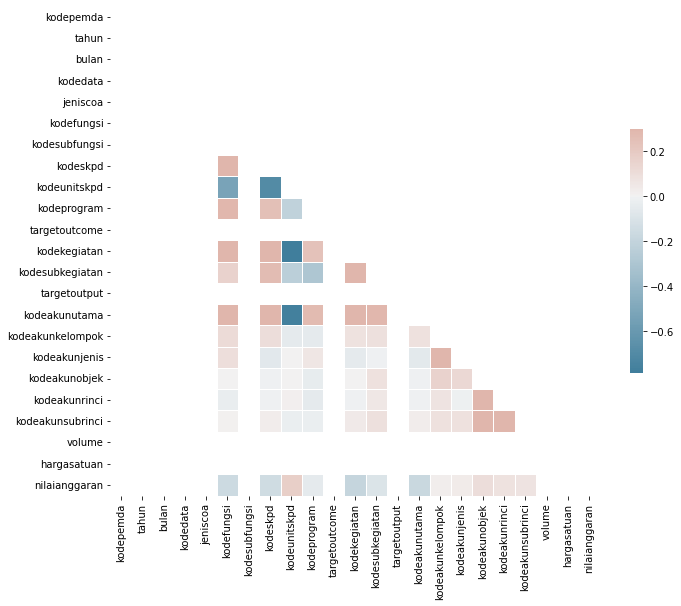

In [ ]:
#Mencari korelasi menggunakan heatmap.
corr = data2.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
#Mengecek nilai dari korelasi tersebut.

korelasi = data2['kodeakunutama'].corr(data2['kodekegiatan'])
korelasi

0.977059001695074

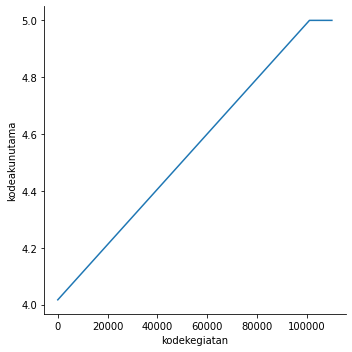

In [ ]:
#Melihat relasi menggunakan lineplot

sns.relplot(x="kodekegiatan", y="kodeakunutama", ci=None, kind="line", data=data2);

EDA

In [ ]:
def plot_uni_cat(d):
    f,ax = plt.subplots(nrows=1,ncols=2,figsize=(8,5))
    f.suptitle(d.name+' Wise Sale',fontsize=15)
    sns.countplot(d,ax=ax[0])
    d.value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1])
    plt.tight_layout()

101000    647
102000    563
106000    159
108000    144
103000    143
0         120
109000     94
107000     57
105000     35
104000     32
110000      6
Name: kodekegiatan, dtype: int64


c:\Users\hp5cg\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


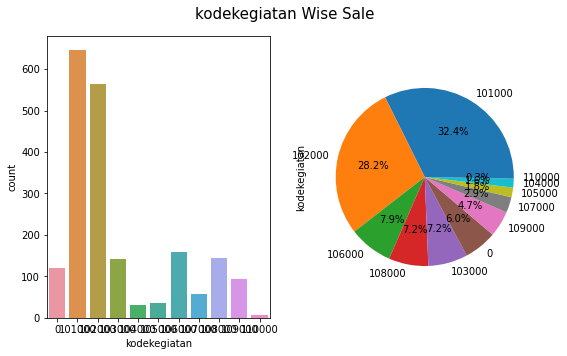

In [ ]:
print(data2.kodekegiatan.value_counts())
plot_uni_cat(data2['kodekegiatan'])

Numerical Features

In [ ]:
def plot_uni(d):
    f,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
    sns.histplot(d, kde=True, ax=ax[0])
    ax[0].axvline(d.mean(), color='y', linestyle='--',linewidth=2)
    ax[0].axvline(d.median(), color='r', linestyle='dashed', linewidth=2)
    ax[0].axvline(d.mode()[0],color='g',linestyle='solid',linewidth=2)
    ax[0].legend({'Mean':d.mean(),'Median':d.median(),'Mode':d.mode()})
    
    sns.boxplot(x=d, showmeans=True, ax=ax[1])
    plt.tight_layout()

In [ ]:
num_cols = data2.select_dtypes('int64').columns.values
num_cols

array(['tahun', 'bulan', 'kodedata', 'jeniscoa', 'kodefungsi',
       'kodesubfungsi', 'kodeskpd', 'kodeunitskpd', 'kodeprogram',
       'targetoutcome', 'kodekegiatan', 'kodesubkegiatan', 'targetoutput',
       'kodeakunutama', 'kodeakunkelompok', 'kodeakunjenis',
       'kodeakunobjek', 'kodeakunrinci', 'kodeakunsubrinci', 'volume',
       'hargasatuan', 'nilaianggaran'], dtype=object)

C:\Users\hp5cg\AppData\Local\Temp\ipykernel_28576\596864641.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,5))


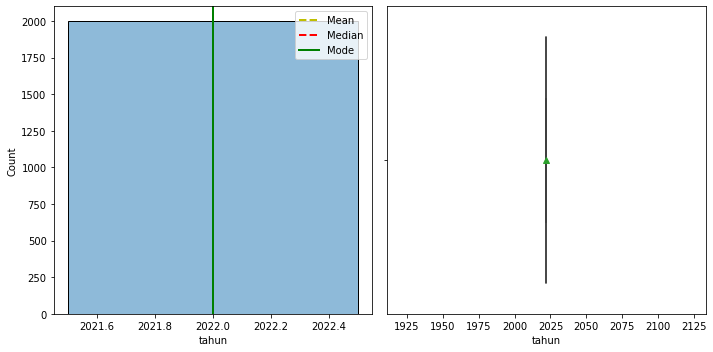

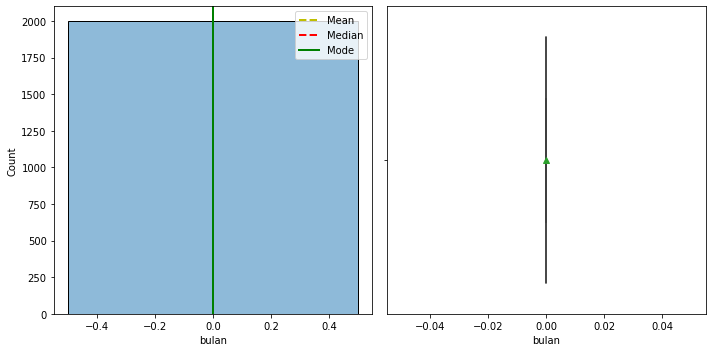

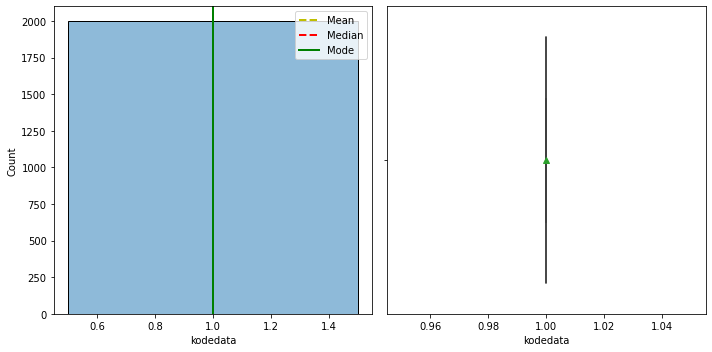

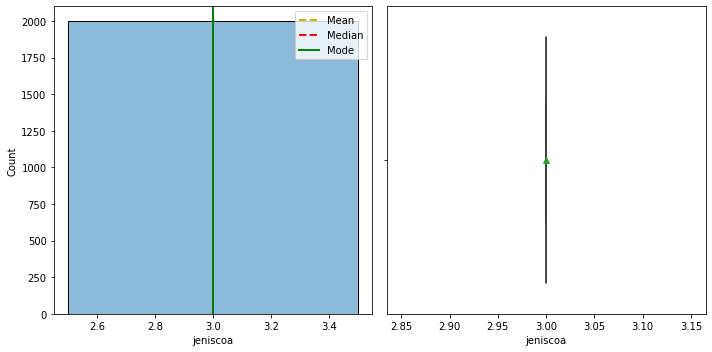

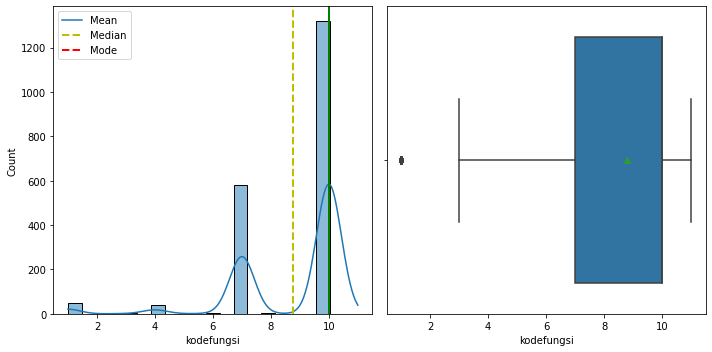

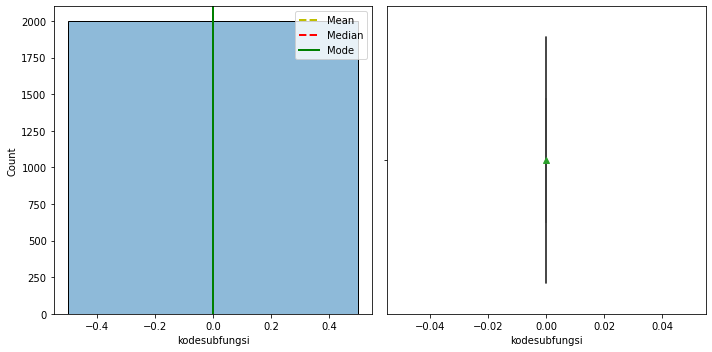

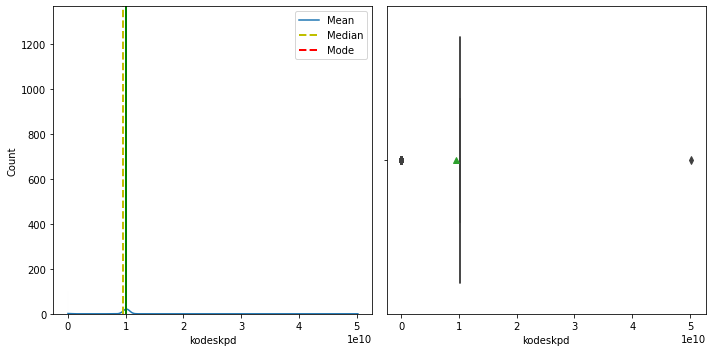

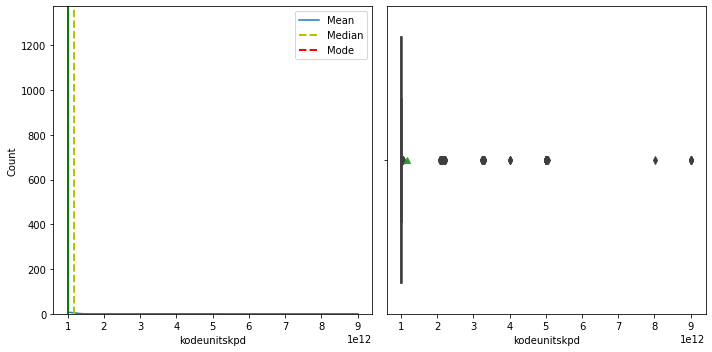

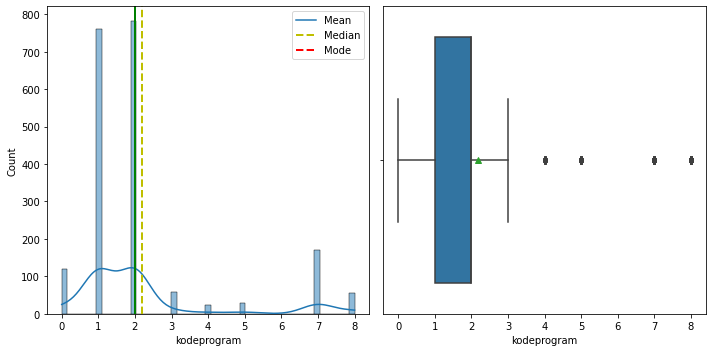

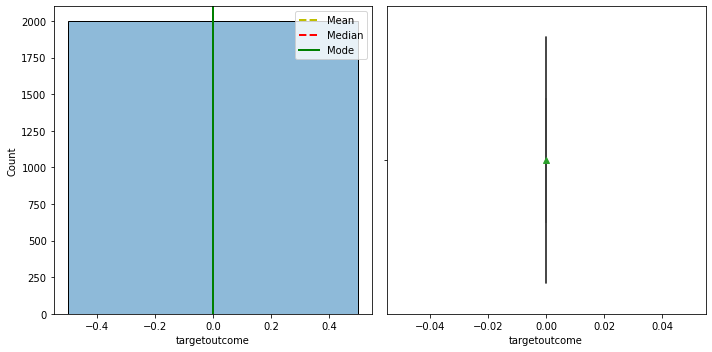

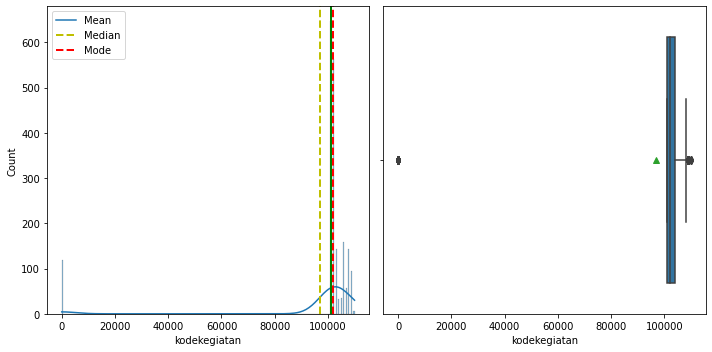

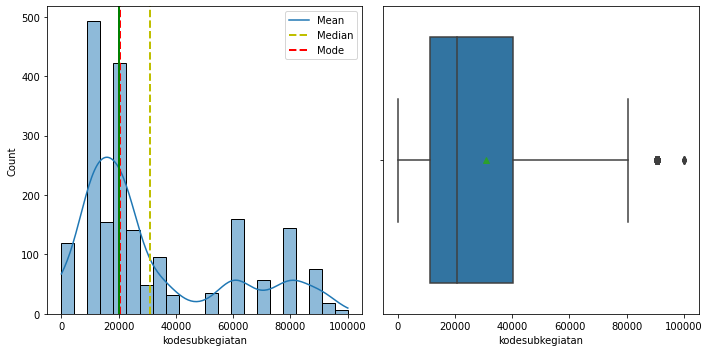

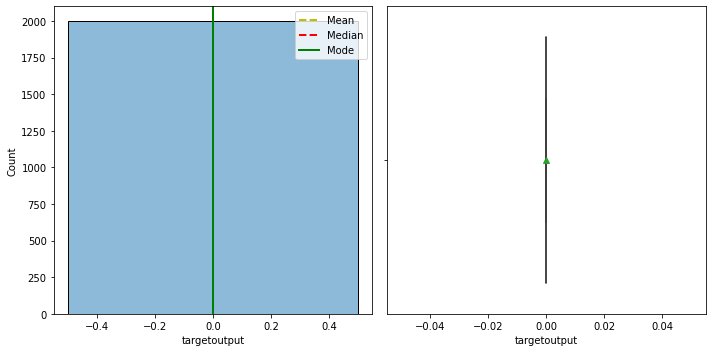

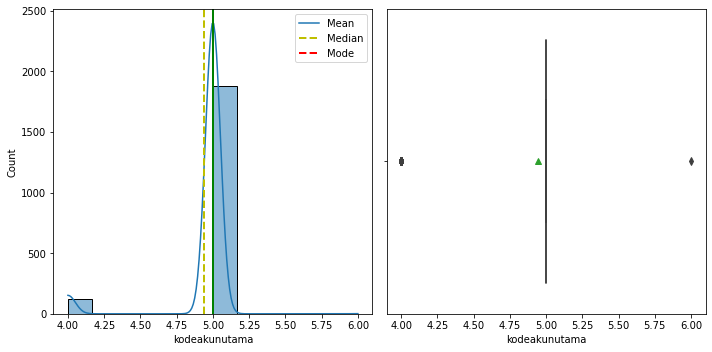

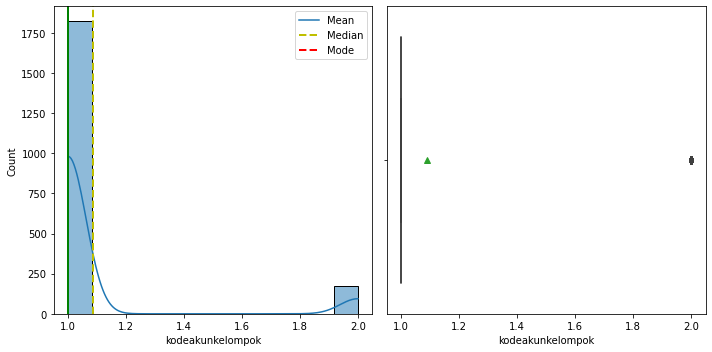

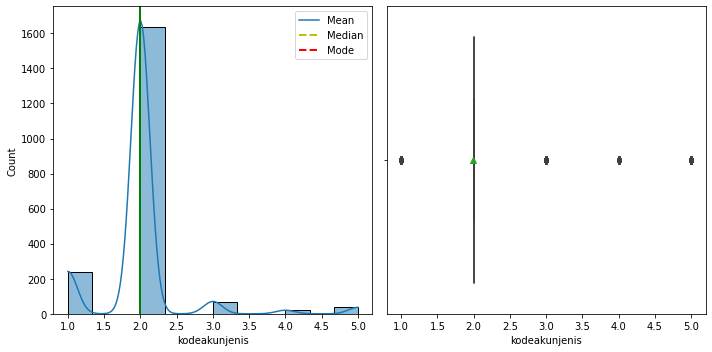

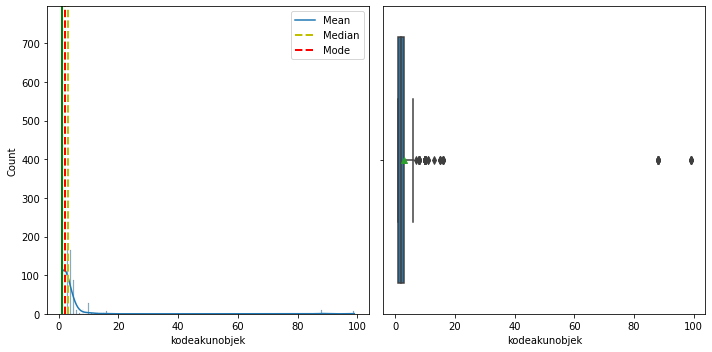

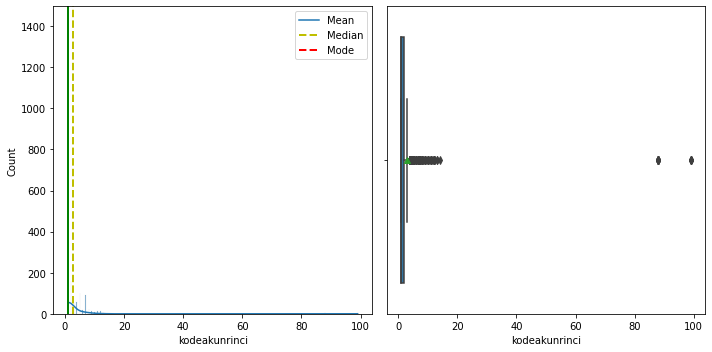

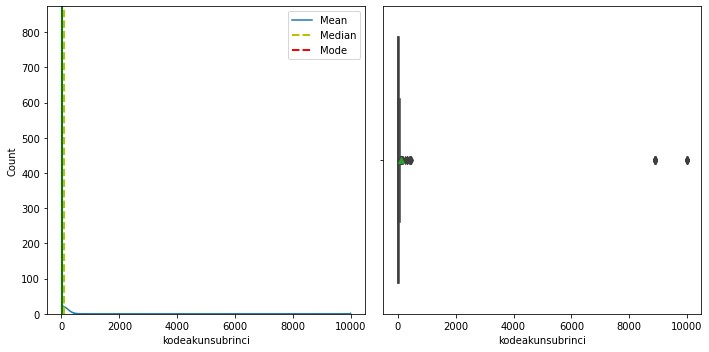

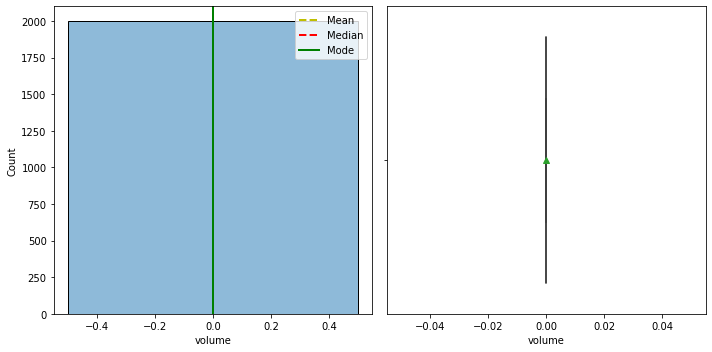

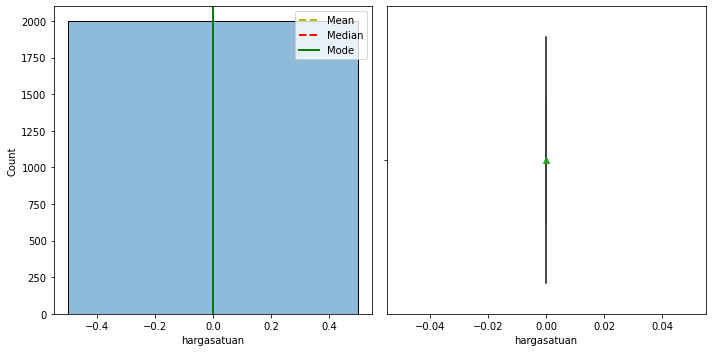

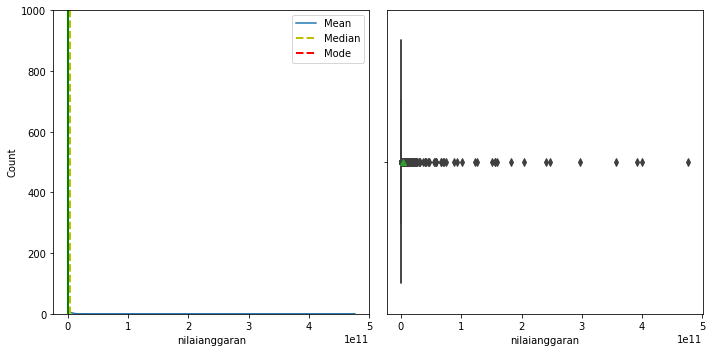

In [ ]:
for f in num_cols:
    plot_uni(data2[f])

Bivariate analysis

In [ ]:
data2.groupby(by='namapemda')['nilaianggaran'].mean() 

namapemda
Provinsi Aceh    3.251770e+09
Name: nilaianggaran, dtype: float64

In [ ]:
print(data[['namapemda','nilaianggaran']].value_counts().sort_index()) 

namapemda      nilaianggaran
Provinsi Aceh  1347             1
               14592            1
               17432            1
               24000            1
               28263            1
                               ..
               297652670000     1
               357289621288     1
               391508000000     1
               399706009000     1
               476370000000     1
Length: 1539, dtype: int64


Linear Regression

In [ ]:
y,X = dmatrices('kodepemda ~ nilaianggaran', data=data2, return_type='dataframe')
print("X:", type(X))
print(X.columns)
model=sm.OLS(y, X)
result=model.fit()
result.summary()

X: <class 'pandas.core.frame.DataFrame'>
Index(['Intercept', 'nilaianggaran'], dtype='object')


c:\Users\hp5cg\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              kodepemda   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                    -1998.
Date:                Tue, 28 Jun 2022   Prob (F-statistic):               1.00
Time:                        16:06:11   Log-Likelihood:                 70586.
No. Observations:                2000   AIC:                        -1.412e+05
Df Residuals:                    1998   BIC:                        -1.412e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.0000   2.57e-18   3.89e+17      0.000       1.000       1.000
nilaianggaran -7.068e-28   1.06e-28     -6.677      0.000   -9.14e-28   -4.99e-28
==============================================================================
Omnibus:                     3691.771   Durbin-Watson:                   0.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3603587.662
Skew:                          13.584   Prob(JB):                         0.00
Kurtosis:                     209.167   Cond. No.                     2.45e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.45e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
model = sm.OLS.from_formula('kodepemda ~ nilaianggaran', data = data2)
results = model.fit()
print(results.params)

Intercept        1.000000e+00
nilaianggaran   -7.068194e-28
dtype: float64


Classification

In [ ]:
data2['rate_code'] = (data2['nilaianggaran'] > 4).astype(np.float32)

c:\Users\hp5cg\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\hp5cg\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\hp5cg\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2657: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
c:\Users\hp5cg\AppData\Local\Programs\Python\Python310\lib

<AxesSubplot:ylabel='Density'>

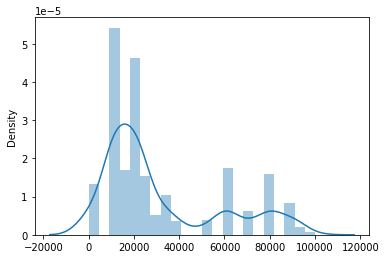

In [ ]:
y, X = dmatrices('rate_code ~ kodesubkegiatan', data = data2)
sns.distplot(X[y[:,0] > 0, 1])
sns.distplot(X[y[:,0] == 0, 1])

Classification using Sklearn's LogisticRegression

In [ ]:
y, X = dmatrices('rate_code ~ nilaianggaran', data = data2)
model = sklearn.ensemble.RandomForestClassifier()
model.fit(X, y)
yhat = model.predict(X)
print(sklearn.metrics.classification_report(y, yhat))

C:\Users\hp5cg\AppData\Local\Temp\ipykernel_28576\2311085705.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X, y)


              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00      2000

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

